# Homework 1 <span style="color:red">11/11</span>.

Please submit all your homework as a jupyter notebook on NYU brightspace. 
Notebooks should run and produce the required data, plots, output, etc. 

Name: Aurelia Meiqi Brook


## Question 1: It's all about cars
Consider the example class that makes cars:

In [1]:
class cars:
    #This makes a class that represents cars
    def __init__(self, brand, model, color, type):
        self.brand = brand
        self.model = model
        self.type = type
        self.gas_tank_size = 14 #In gallons
        self.fuel_level = 0
        self.color = color

    def fuel_up(self):
        self.fuel_level = self.gas_tank_size
        print('Gas tank is now full.')

    def drive(self):
        if self.fuel_level == 0:
            print("You are out of gas. Fuel up.")
        elif self.fuel_level == 1:
            print("You're running on fumes. Fuel up!")
            self.fuel_level -= 1
            print(f'The {self.model} is now driving.')
        else: 
            self.fuel_level -= 1
            print(f'The {self.model} is now driving.')

1. Change the class to also have "color" as an attribute. Make sure that users can initialize the color when they make a car object.

2. When we make the car drive, it tells us the car is driving. That's very cute, but unfortunately real cars use up gas when they are driving. Change the drive() function to lower the fuel level by 1 gallon every time you call it. 

3. The fuel level can clearly not go below zero. Make sure this is impossible and print out a warning when the car is out of gas.

4. It would be nice to have a message indicating that we're almost out of gas before it is too late. When the fuel level reaches one gallon, notify us that we're running on fumes.

42. Make your favorite car and drive it around!


In [2]:
car = cars("Honda", "Accord", "Red", cars)

In [3]:
car.fuel_up()
for i in range(16):
    print(f"Drive {i+1}:")
    car.drive()

Gas tank is now full.
Drive 1:
The Accord is now driving.
Drive 2:
The Accord is now driving.
Drive 3:
The Accord is now driving.
Drive 4:
The Accord is now driving.
Drive 5:
The Accord is now driving.
Drive 6:
The Accord is now driving.
Drive 7:
The Accord is now driving.
Drive 8:
The Accord is now driving.
Drive 9:
The Accord is now driving.
Drive 10:
The Accord is now driving.
Drive 11:
The Accord is now driving.
Drive 12:
The Accord is now driving.
Drive 13:
The Accord is now driving.
Drive 14:
You're running on fumes. Fuel up!
The Accord is now driving.
Drive 15:
You are out of gas. Fuel up.
Drive 16:
You are out of gas. Fuel up.


## Question 2: Computing $\pi$

Consider the integral
\begin{equation}
F=\int_0^1 {\rm d}x \sqrt{1-x^2}.
\end{equation}

1. Show that this analytically that this integral is $\pi/4$
2. Write a function that draws uniform random numbers $(x, y)$ with $x \in [0, 1]$ and $y \in [0, 1]$. Each such random ($x_i, y_i$) point is tested to see whether it lies in the unit circle, i.e.
\begin{equation}
y_i \leq \sqrt{1-x_i^2}
\end{equation}
Since the ratio of the area of the circle to the area of the square is $\pi/4$, and since the random $(x, y)$ points are
uniformly distributed, the fraction of $(x, y)$ points lying within the circle should provide an increasingly better
estimate of $\pi/4$ as more random numbers are drawn.
3.  Use the function from 2. to estimate $\pi$ using $N$ = 10, 100, 1000, 10, 000 points and calculate the error in your estimate. Make a plot of the error as a function of $N$. Explain the result.

#### Answers:

1.
\begin{equation}
x = \sin{u}, {\rm d}x = \cos{u} {\rm d}u,  u = \arcsin{x} \\
F=\int_{0}^{\frac{\pi}{2}} {\rm d}u \cos{u} \sqrt{1-\sin{u}^2} \\
F=\int_{0}^{\frac{\pi}{2}} \cos^2{u} {\rm d}u \\
= \frac{\cos{u} \sin{u}}{2} + \frac{u}{2} \\
= \frac{\cos{\frac{\pi}{2}} \sin{\frac{\pi}{2}}}{2} + \frac{\frac{\pi}{2}}{2} - \frac{\cos{0} \sin{0}}{2} - \frac{0}{2}\\
= 0 + \frac{\pi}{4} - 0 - 0 \\
= \frac{\pi}{4} \\
\end{equation}


In [4]:
from random import uniform


def in_UnitCircle():
    x = uniform(0, 1)
    y = uniform(0, 1)
    return y <= (1-x**2)**0.5

In [5]:
def estimate(N):
    count = 0
    for i in range(N):
        if in_UnitCircle():
            count+=1
    return count*4/N

<module 'matplotlib.pyplot' from '/home/mdupont/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

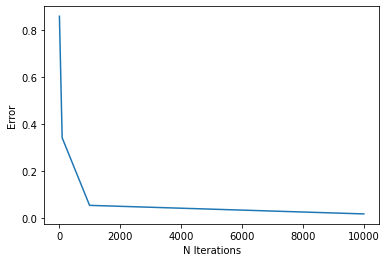

In [6]:
import math
import matplotlib.pyplot as plt

iterations = [10, 100, 1000, 10000]
error = [abs(math.pi - estimate(i)) for i in iterations]
plt.plot(iterations, error)
plt.xlabel("N Iterations")
plt.ylabel("Error")
plt

## Question 3: Taylor series exponential

The series expansion of the exponential function around zero is 
\begin{equation}
e^x =\sum_{n=0}^\infty \frac{x^n}{n!}=\sum_{n=0}^\infty c_n(x),
\end{equation}
where the last equality defines $c_n(x)$.

1. Show that $c_n(x)$ can easily be computed from $c_{n-1}(x)$.
2. Use the previous result to make a function that computes an approximation of the exponential by computing the Taylor series to order $N$. Make it such that it only keeps two local variables. 
3. Make a plot of the convergence with $N$ by comparing the result to numpy's evaluation of the exponential for some $x$.

#### Answers
1. $c_n(x) = \frac{x^n}{n!} \\
c_{n-1}(x) = \frac{x^{n-1}}{(n-1)!} \\ 
c_n(x) = c_{n-1}(x)\cdot\frac{x}{n}$

In [7]:
import numpy as np

def approxX(x, N):
    total = 0
    curr = 1
    for i in range(1, N+1):
        total += curr
        curr *= x/i
    return total

<module 'matplotlib.pyplot' from '/home/mdupont/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

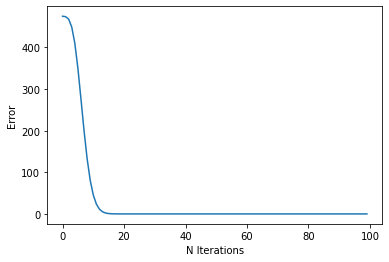

In [8]:
x = uniform(0, 10)
iterations = list(range(100))
error = [abs(np.exp(x) - approxX(x, i)) for i in iterations]
plt.plot(iterations, error)
plt.xlabel("N Iterations")
plt.ylabel("Error")
plt